In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import warnings
from plotly.subplots import make_subplots

warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv('../dataset/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [38]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [39]:
df.shape

(918, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [41]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
counts = df['HeartDisease'].value_counts().reset_index()
counts.columns = ['HeartDisease','count']
fig = px.bar(counts, x='HeartDisease', y='count', title='Heart Disease Distribution')
fig.show()

In [44]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

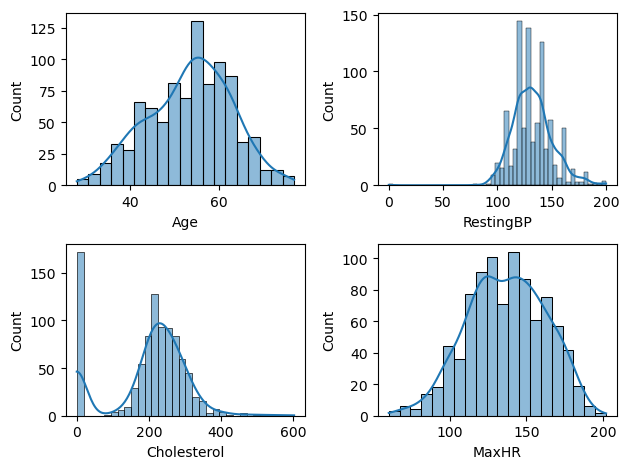

In [45]:
def plotting(var, number):
    plt.subplot(2, 2, number)
    sns.histplot(df[var], kde=True)
plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)
plt.tight_layout()

In [46]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [47]:
#here we can see that 172 people have 0 cholesterol so we will fill the missing values with mean
ch_mean = df[df['Cholesterol']>0]['Cholesterol'].mean()
df['Cholesterol'].replace(0, ch_mean, inplace=True)

rbp_mean = df[df['RestingBP']>0]['RestingBP'].mean()
df['RestingBP'].replace(0, rbp_mean, inplace=True)


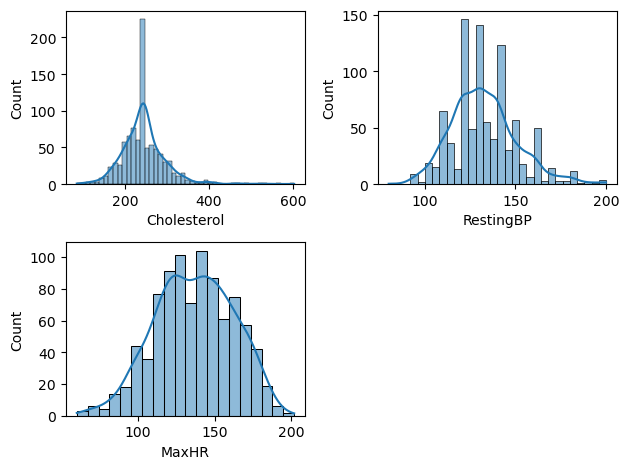

In [48]:
plotting('Cholesterol', 1)
plotting('RestingBP', 2)
plotting('MaxHR', 3)

plt.tight_layout()

<Axes: xlabel='Sex', ylabel='count'>

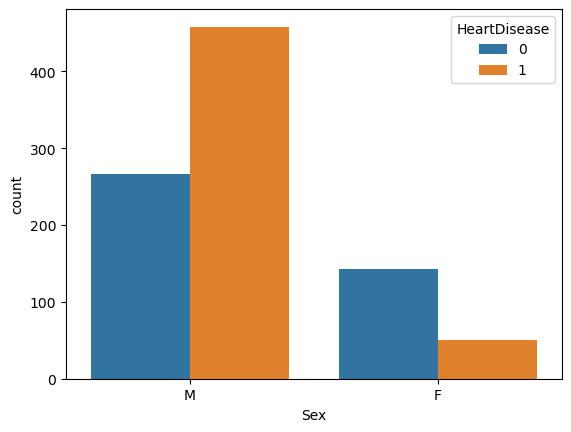

In [49]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

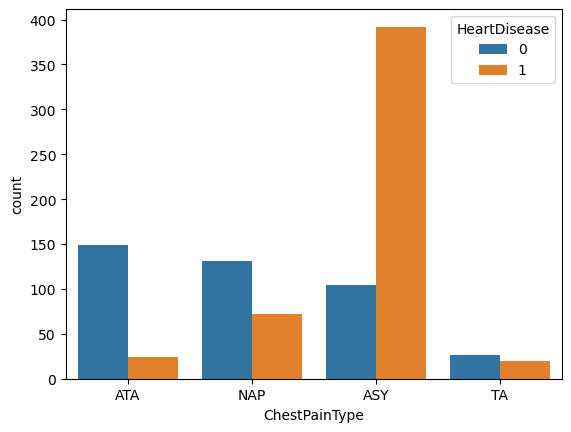

In [50]:
sns.countplot(x = df['ChestPainType'],hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

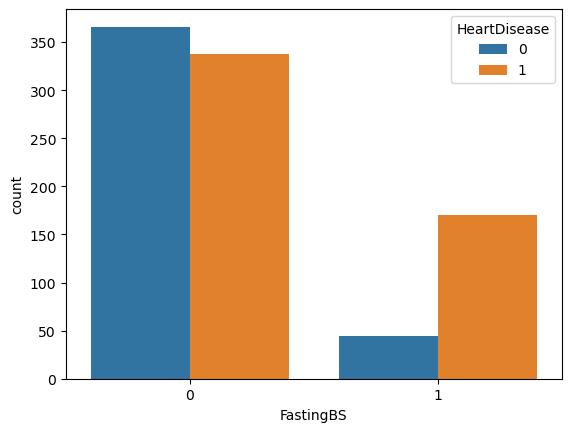

In [51]:
sns.countplot(x = df['FastingBS'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

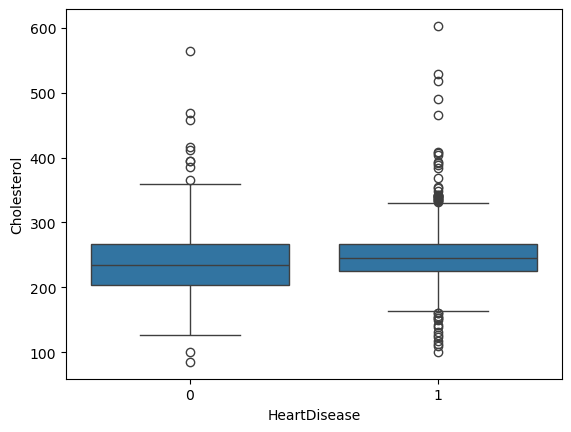

In [52]:
sns.boxplot(y='Cholesterol', x='HeartDisease', data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

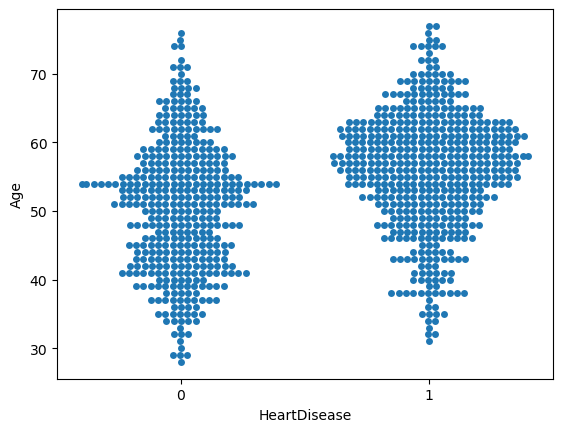

In [53]:
sns.swarmplot(y='Age', x='HeartDisease', data=df, )

<Axes: >

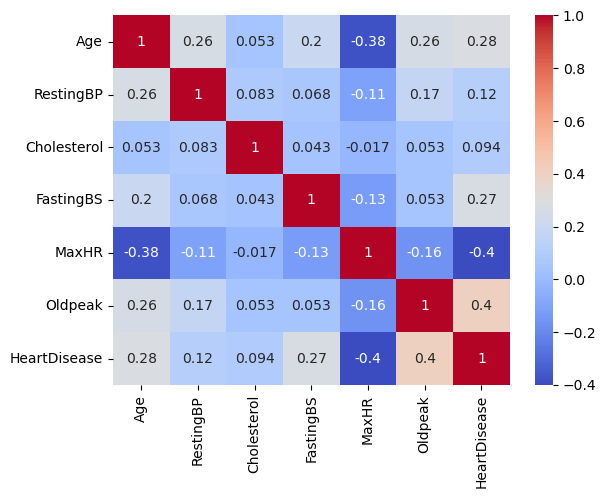

In [54]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


In [55]:
df_encode = pd.get_dummies(df,drop_first=True)
df_encode = df_encode.astype(int)
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1


In [56]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']
scaler = StandardScaler()
df_encode[numerical_columns] = scaler.fit_transform(df_encode[numerical_columns])
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [58]:
x = df_encode.drop('HeartDisease', axis=1)
y = df_encode['HeartDisease']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [61]:
models= {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=9)
}

In [62]:
result = []

In [63]:
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1s = f1_score(y_test, y_pred)
    result.append({'Model': name, 'Accuracy': acc , 'f1_score':f1s})
print(result)

[{'Model': 'Logistic Regression', 'Accuracy': 0.8695652173913043, 'f1_score': 0.8857142857142857}, {'Model': 'Naive Bayes', 'Accuracy': 0.8532608695652174, 'f1_score': 0.8682926829268293}, {'Model': 'Decision Tree', 'Accuracy': 0.782608695652174, 'f1_score': 0.801980198019802}, {'Model': 'SVM', 'Accuracy': 0.8478260869565217, 'f1_score': 0.8679245283018868}, {'Model': 'KNN', 'Accuracy': 0.8695652173913043, 'f1_score': 0.8857142857142857}]


In [64]:
import joblib
joblib.dump(models['KNN'], 'KNN_heart_disease_model.pkl')
joblib.dump(scaler, 'scaler_heart_disease_model.pkl')
joblib.dump(x.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']